In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
anime = pd.read_csv('anime.csv')  # make sure anime.csv is in the same folder
anime.head()


,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [9]:
# Quick overview
anime.info()          # Check columns, data types, and non-null counts
anime.isnull().sum()  # Count missing values per column
anime.describe()      # Summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [10]:
# Convert Score, Episodes, Rank to numeric
anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')
anime['Episodes'] = pd.to_numeric(anime['Episodes'].replace(['Unknown','?'], 0), errors='coerce')
anime['Rank'] = pd.to_numeric(anime['Rank'], errors='coerce')

# Fill any missing Score or Rank with 0
anime['Score'] = anime['Score'].fillna(0)
anime['Rank'] = anime['Rank'].fillna(0)

# Split Genres and explode
anime['Genres'] = anime['Genres'].str.split(', ')
anime_exploded = anime.explode('Genres')

# Quick check
anime_exploded[['Name','Score','Episodes','Genres']].head(10)


,Name,Score,Episodes,Genres
0,Cowboy Bebop,8.75,26.0,Action
0,Cowboy Bebop,8.75,26.0,Award Winning
0,Cowboy Bebop,8.75,26.0,Sci-Fi
1,Cowboy Bebop: Tengoku no Tobira,8.38,1.0,Action
1,Cowboy Bebop: Tengoku no Tobira,8.38,1.0,Sci-Fi
2,Trigun,8.22,26.0,Action
2,Trigun,8.22,26.0,Adventure
2,Trigun,8.22,26.0,Sci-Fi
3,Witch Hunter Robin,7.25,26.0,Action
3,Witch Hunter Robin,7.25,26.0,Drama


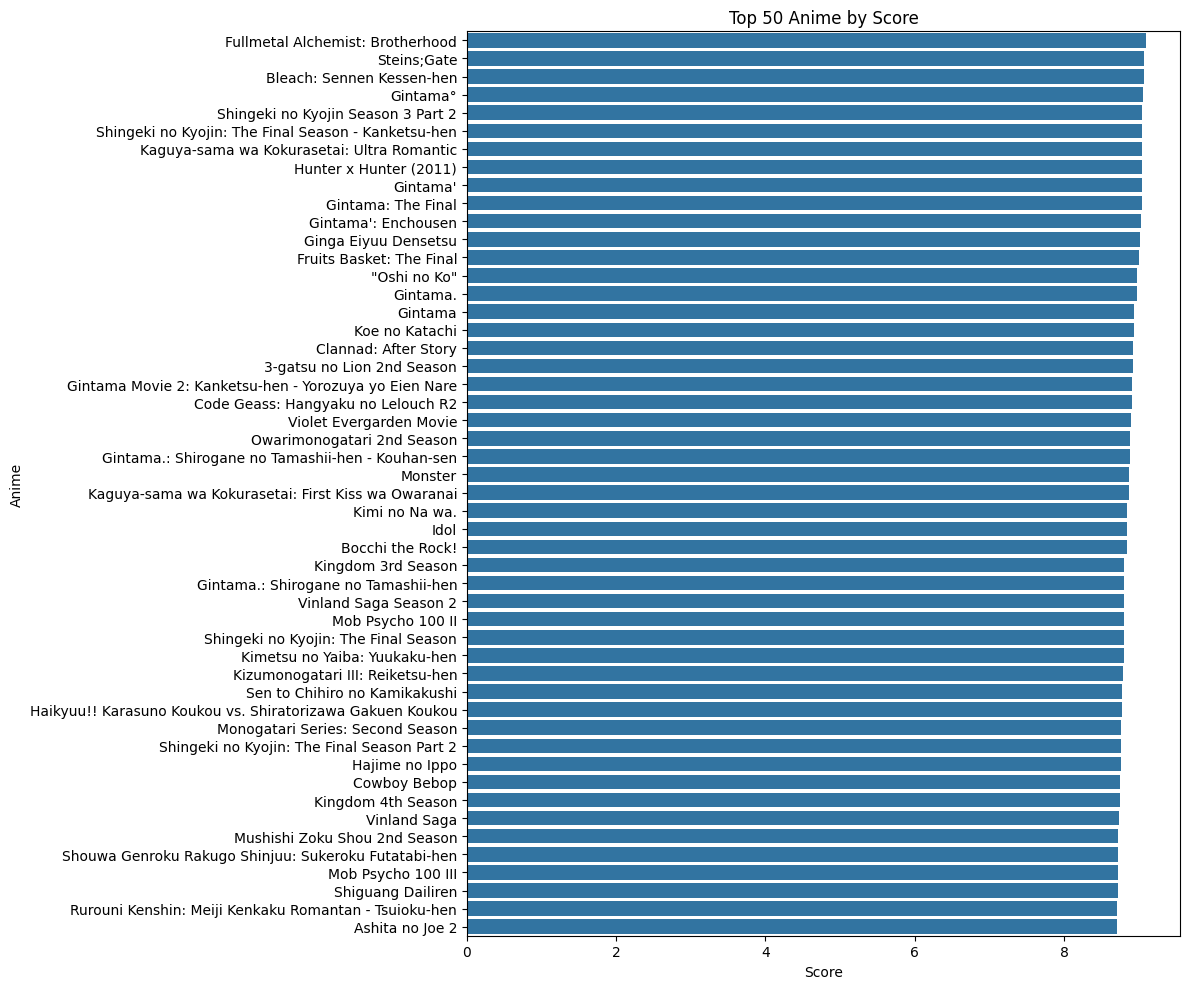

In [11]:
# Take top 50 anime by Score
top_50 = anime.sort_values('Score', ascending=False).head(50)

plt.figure(figsize=(12,10))
sns.barplot(x='Score', y='Name', data=top_50)
plt.title("Top 50 Anime by Score")
plt.xlabel("Score")
plt.ylabel("Anime")
plt.tight_layout()
plt.show()


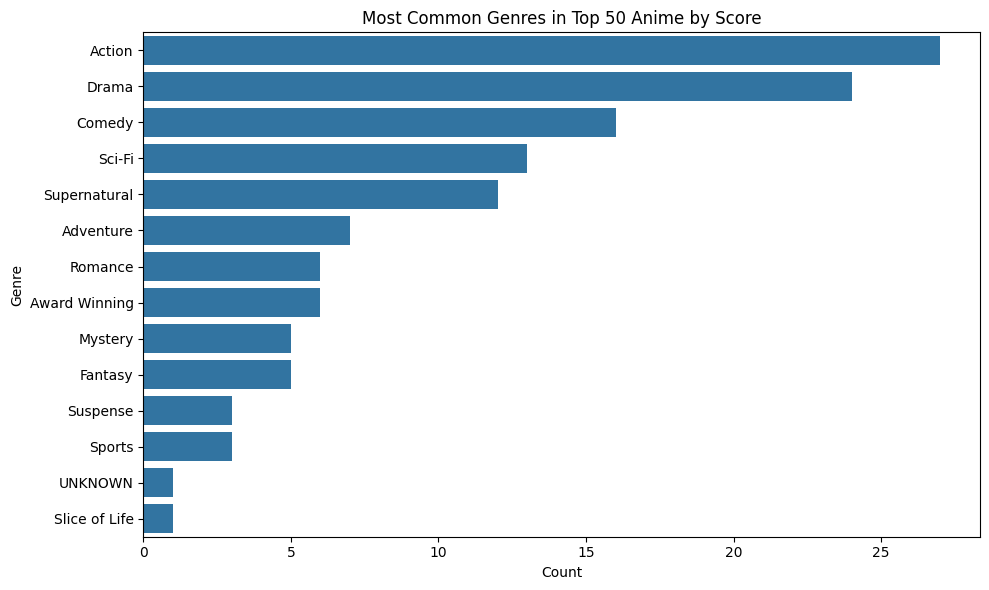

In [12]:
# Explode Genres for the top 50
top_50_exploded = top_50.explode('Genres')

plt.figure(figsize=(10,6))
sns.countplot(y='Genres', 
              data=top_50_exploded, 
              order=top_50_exploded['Genres'].value_counts().index)
plt.title("Most Common Genres in Top 50 Anime by Score")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


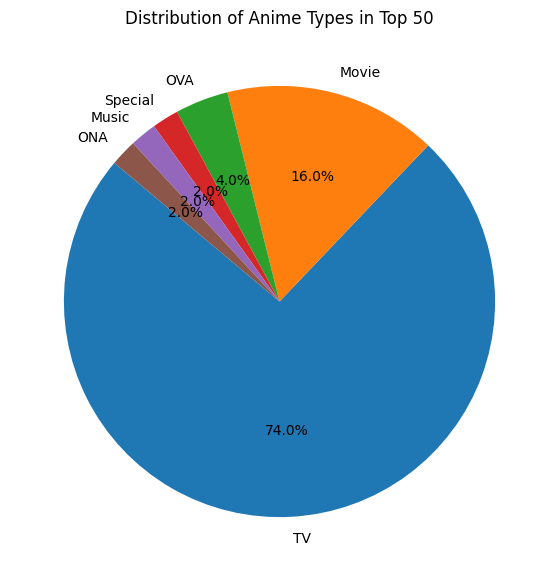

In [13]:
# Count by Type
type_counts = top_50['Type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Anime Types in Top 50")
plt.show()


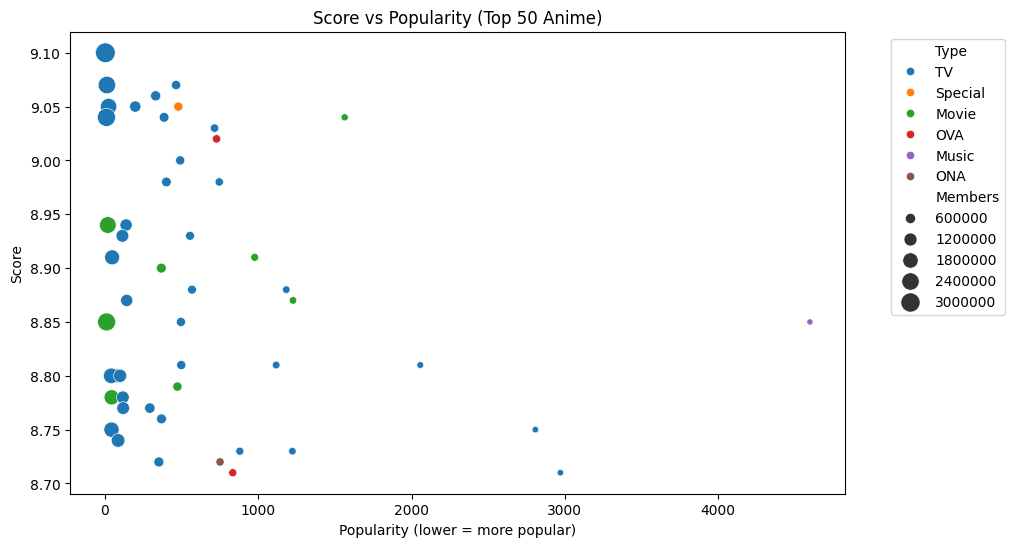

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_50, x='Popularity', y='Score', hue='Type', size='Members', sizes=(20,200))
plt.title("Score vs Popularity (Top 50 Anime)")
plt.xlabel("Popularity (lower = more popular)")
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


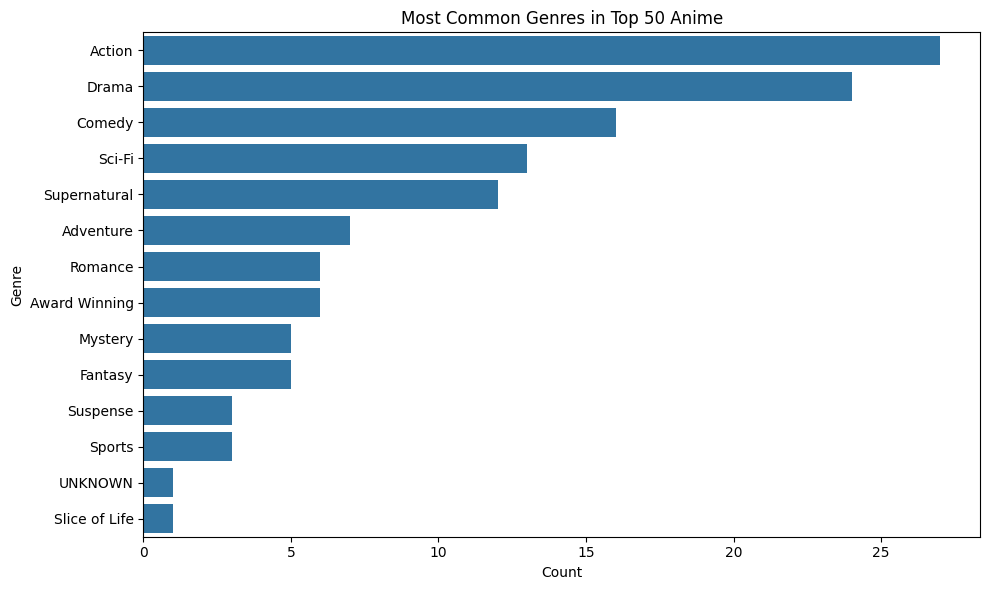

In [16]:
top_50_exploded = top_50.explode('Genres')

plt.figure(figsize=(10,6))
sns.countplot(y='Genres', 
              data=top_50_exploded, 
              order=top_50_exploded['Genres'].value_counts().index)
plt.title("Most Common Genres in Top 50 Anime")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


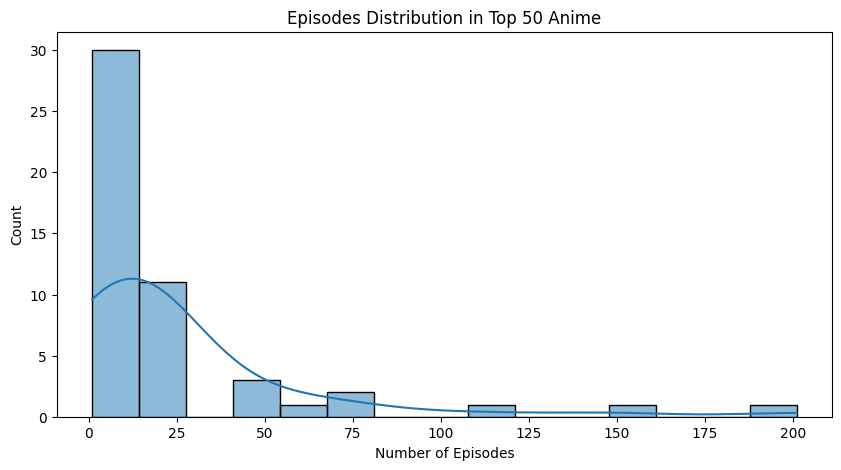

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(top_50['Episodes'], bins=15, kde=True)
plt.title("Episodes Distribution in Top 50 Anime")
plt.xlabel("Number of Episodes")
plt.ylabel("Count")
plt.show()
